In [ ]:
cd ./path

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use("fivethirtyeight")
pd.set_option('display.float_format',lambda x : '%.5f'%x)

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
display(train.head())
display(test.head())

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.00000,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.00000,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.00000,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.00000,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.00000,2,0,0,73,0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.00000,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.00000,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.00000,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.00000,7,0,0,61


# Data
######  -> The target varibale is is_promoted which is imbalanced data of 91.5% of data belonging to class 0 which is not promoted 

In [4]:
sub = pd.DataFrame()
sub['employee_id'] = test['employee_id']
print(train.shape,test.shape) 

(54808, 14) (23490, 13)


In [5]:
train.is_promoted.value_counts()/train.shape[0]

0   0.91483
1   0.08517
Name: is_promoted, dtype: float64

In [6]:
display(train.isnull().sum())
display(test.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

# Filling Nan values in the data

In [7]:
#We have Nan values in column ['education','previous_year_rating']

In [8]:
train['previous_year_rating'].value_counts()

3.00000    18618
5.00000    11741
4.00000     9877
1.00000     6223
2.00000     4225
Name: previous_year_rating, dtype: int64

In [9]:
#The 'previous_year_rating' represent the score of employees based on the previous year 
#We have one more column in the data which represent the duration of employees ('length_of_service')

In [10]:
train['length_of_service'].unique()

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

In [11]:
train[train.previous_year_rating.isnull()]['length_of_service'].describe()

count   4124.00000
mean       1.00000
std        0.00000
min        1.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        1.00000
Name: length_of_service, dtype: float64

In [12]:
#'length_of_service' is 1 for all Nan values in 'previous_year_rating', this is beacuse they are fresheres in the company

In [13]:
train['previous_year_rating'].fillna(0,inplace = True)
test['previous_year_rating'].fillna(0,inplace = True)

In [14]:
print("null values: ",train.education.isnull().sum())
train.education.value_counts()

null values:  2409


Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [15]:
#We can have a new category for 2409 values :) "Unknown" or else we can fill values with 'Bachelor' (mode)

In [16]:
train.education.fillna('Unknown',inplace = True)
test.education.fillna('Unknown',inplace = True)

# EDA & new_features

In [17]:
train.head(7)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.00000,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.00000,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.00000,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.00000,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.00000,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.00000,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.00000,5,0,0,59,0


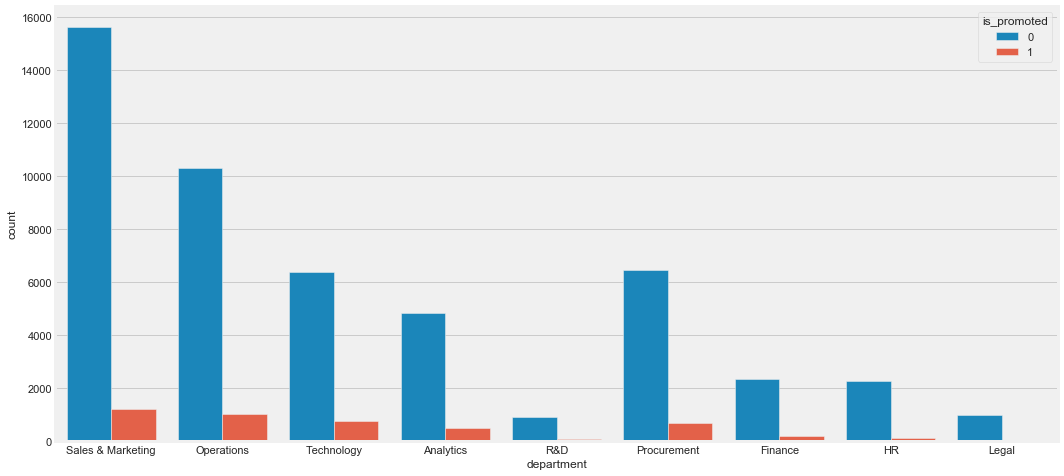

In [18]:
#department
plt.figure(figsize = (16,8))
sns.countplot(x = 'department',hue = 'is_promoted',data = train)

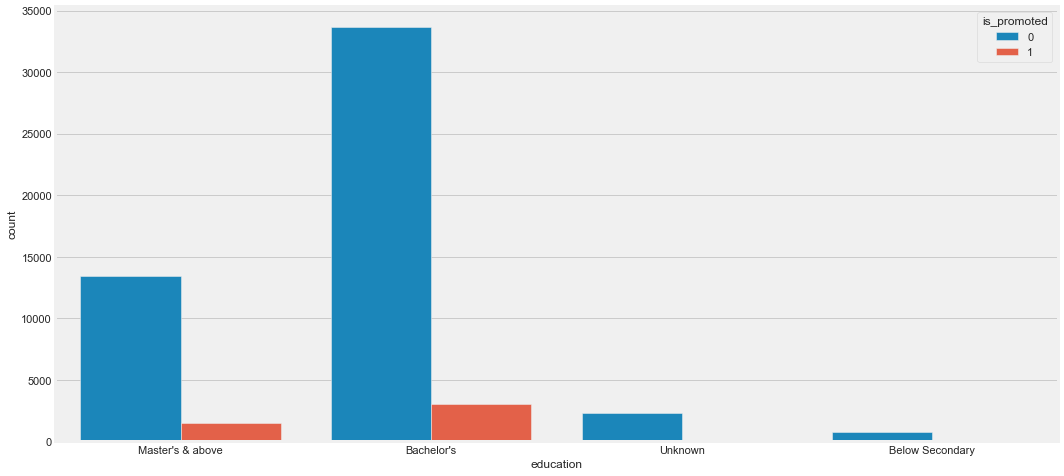

In [19]:
#department
plt.figure(figsize = (16,8))
sns.countplot(x = 'education',hue = 'is_promoted',data = train)

In [20]:
train.groupby(['education']).mean()['is_promoted']

education
Bachelor's         0.08203
Below Secondary    0.08323
Master's & above   0.09856
Unknown            0.05064
Name: is_promoted, dtype: float64

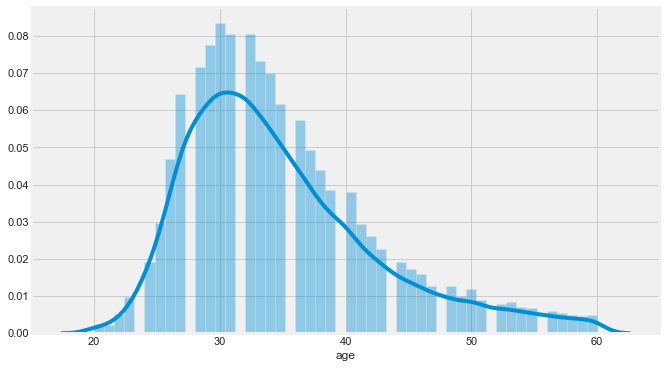

In [21]:
#age
plt.figure(figsize = (10,6))
sns.distplot(train['age'])

In [22]:
pd.cut( x=train['age'], bins=[19, 29, 39, 49,61], labels=['20', '30', '40','60'] ).value_counts()

30    28030
20    14453
40     8952
60     3373
Name: age, dtype: int64

In [23]:
train['age'] = pd.cut( x=train['age'], bins=[19, 29, 39, 49,61], labels=['20', '30', '40','60'] )
test['age']  = pd.cut( x=test['age'], bins=[19, 29, 39, 49,61],  labels=['20', '30', '40','60'] )

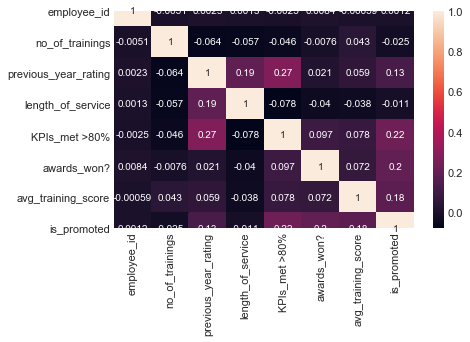

In [24]:
sns.heatmap(train.corr(), annot = True)

In [25]:
#'no_of_trainings' & 'avg_training_score'

In [26]:
#There is negative relation between 'no_of_training' and 'is_prmoted'
train[['no_of_trainings','avg_training_score']].describe()

,no_of_trainings,avg_training_score
count,54808.00000,54808.00000
mean,1.25301,63.38675
std,0.60926,13.37156
min,1.00000,39.00000
25%,1.00000,51.00000
50%,1.00000,60.00000
75%,1.00000,76.00000
max,10.00000,99.00000


In [27]:
print(train[train.no_of_trainings > 1]['is_promoted'].mean())
print(train[train.no_of_trainings >= 2]['is_promoted'].mean())
print(train[train.no_of_trainings >= 3]['is_promoted'].mean())
print(train[train.no_of_trainings >= 5]['is_promoted'].mean())

0.07267497603068072
0.07267497603068072
0.06262791649611134
0.02512562814070352


In [28]:
train[train.no_of_trainings == 1]['is_promoted'].mean()

0.08810671954572086

In [29]:
train[train['avg_training_score']/train['no_of_trainings'] < 39]['is_promoted'].value_counts()
#0   0.93981
#1   0.05683

0    7557
1     457
Name: is_promoted, dtype: int64

In [30]:
#More no of training less chances of promototion 
#avg_training_score/no_of_trainings == (sum_of_training_score)/(no_of_training)**2  ##Thus creating a polynomial feature

In [31]:
train['score/n*n'] = train['avg_training_score']/train['no_of_trainings']
test['score/n*n'] = test['avg_training_score']/test['no_of_trainings']

In [32]:
train.corr()['score/n*n']['is_promoted']

0.138646255875229

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  int64   
 1   department            54808 non-null  object  
 2   region                54808 non-null  object  
 3   education             54808 non-null  object  
 4   gender                54808 non-null  object  
 5   recruitment_channel   54808 non-null  object  
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  category
 8   previous_year_rating  54808 non-null  float64 
 9   length_of_service     54808 non-null  int64   
 10  KPIs_met >80%         54808 non-null  int64   
 11  awards_won?           54808 non-null  int64   
 12  avg_training_score    54808 non-null  int64   
 13  is_promoted           54808 non-null  int64   
 14  score/n*n             54808 non-null  float64 
dtypes:

In [34]:
train['gender'] = train['gender'].map({'m':1,'f':0})
test['gender'] = test['gender'].map({'m':1,'f':0})

In [35]:
from scipy import stats as ss

In [36]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [37]:
cramers_v(train['region'],train['is_promoted'])

0.08986842586887933

In [38]:
ss.chi2_contingency(pd.crosstab(train['region'],train['is_promoted']))

(475.6402377579206,
 7.275378205784026e-80,
 33,
 array([[5.58046271e+02, 5.19537294e+01],
        [5.92809809e+02, 5.51901912e+01],
        [1.20300139e+03, 1.11998613e+02],
        [4.57414976e+02, 4.25850241e+01],
        [2.42246971e+03, 2.25530288e+02],
        [7.56564370e+02, 7.04356298e+01],
        [2.56884250e+03, 2.39157495e+02],
        [1.34022588e+03, 1.24774121e+02],
        [7.28204642e+02, 6.77953583e+01],
        [2.83597285e+01, 2.64027149e+00],
        [7.99561378e+02, 7.44386221e+01],
        [1.12917461e+04, 1.05125390e+03],
        [7.77605459e+02, 7.23945409e+01],
        [3.75995110e+02, 3.50048898e+01],
        [5.88052693e+03, 5.47473070e+02],
        [1.07492519e+03, 1.00074807e+02],
        [4.64733616e+02, 4.32663845e+01],
        [7.49245731e+02, 6.97542694e+01],
        [2.06751569e+03, 1.92484309e+02],
        [1.51770289e+03, 1.41297110e+02],
        [1.20574588e+03, 1.12254123e+02],
        [9.09340972e+02, 8.46590279e+01],
        [3.16531163e+02, 2.

In [39]:
p_value = 7.275378205784026e-80
'{:f}'.format(p_value)
#Since the p_value is less than 0.05 so we failed to reject the null hypothesis that these variable are not associated

'0.000000'

In [40]:
#education
print('{:f}'.format(ss.chi2_contingency(pd.crosstab(train['education'],train['is_promoted']))[1]))

0.000000


In [41]:
#department
print('{:f}'.format(ss.chi2_contingency(pd.crosstab(train['department'],train['is_promoted']))[1]))

0.000000


# Training

In [42]:
train.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,score/n*n
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,30,5.00000,8,1,0,49,0,49.00000
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.00000,4,0,0,60,0,60.00000
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,30,3.00000,7,0,0,50,0,50.00000


In [43]:
X = train[[ "department", "region", "education", "gender", 
                 "recruitment_channel", "no_of_trainings", "age", "previous_year_rating", 
                 "length_of_service", "KPIs_met >80%", "awards_won?", "avg_training_score","score/n*n"]]

Y = train['is_promoted']
Y = Y.to_frame()

test = test[[ "department", "region", "education", "gender", 
               "recruitment_channel", "no_of_trainings", "age", "previous_year_rating", 
               "length_of_service", "KPIs_met >80%", "awards_won?", "avg_training_score","score/n*n"]]

In [44]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    
    if encoding_strategy == "LabelEncoding":
        print("LabelEncoding")
        Encoder = LabelEncoder()
        for column in encoding_columns :
            print("column",column )
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
        
    elif encoding_strategy == "OneHotEncoding":
        print("OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data)
        
    dtypes_list =['float64','float32','int64','int32']
    encoding_data.astype( dtypes_list[0] ).dtypes
    
    return encoding_data

In [45]:
encoding_columns  = [ "region", "age","department", "education", "recruitment_channel"]
encoding_strategy = [ "LabelEncoding", "OneHotEncoding"]

X = data_encoding( encoding_strategy[1] , X , encoding_columns )
test =  data_encoding( encoding_strategy[1] , test  , encoding_columns )

OneHotEncoding
OneHotEncoding


In [46]:
print(X.columns == test.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [47]:
from sklearn.preprocessing import  RobustScaler
rs = RobustScaler() #Scaling the data

In [48]:
X = pd.DataFrame(rs.fit_transform(X))
test = pd.DataFrame(rs.transform(test))

In [49]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,-1.00000,0.00000,1.00000,0.75000,1.00000,0.00000,-0.44000,-0.34783,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,-1.00000,0.00000,1.00000,0.00000,-1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,1.00000,-0.25000,0.00000,0.00000,0.00000,0.13043,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.50000,0.00000,0.00000,-0.40000,-0.30435,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,1.00000,-1.00000,1.25000,0.00000,0.00000,-0.40000,-1.39130,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,-0.75000,0.00000,0.00000,0.52000,0.69565,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1.00000,0.00000


In [50]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import f1_score, confusion_matrix

In [51]:
classifier = LGBMClassifier(subsample_freq = 2, 
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1, 
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',
                                             learning_rate=0.15, 
                                             n_estimators=494,
                                             max_depth=5, 
                                             scale_pos_weight=2.5)

In [52]:
x_train,x_test,y_train,y_test = tts(X,Y,test_size = 0.2)

In [53]:
classifier.fit(x_train,y_train)
#classifier.fit(X,Y)

LGBMClassifier(boosting_type='dart', importance_type='gain', learning_rate=0.15,
               max_bin=60, max_depth=5, n_estimators=494, num_leaves=300,
               objective='binary', scale_pos_weight=2.5, subsample_freq=2,
               verbosity=-1)

In [54]:
print(confusion_matrix(y_train,classifier.predict(x_train)),"\n")
print(confusion_matrix(y_test,classifier.predict(x_test)))

[[39718   384]
 [ 1960  1784]] 

[[9874  164]
 [ 549  375]]


In [55]:
pred = classifier.predict_proba(x_test)
y_pred = []
for x in pred:
    y_pred.append(x[1])

In [56]:
y_pred1 = []
y_pred2 = []
y_pred3 = []

for x in y_pred:
    if(x > 0.5):
        y_pred1.append(1)
    else:
       y_pred1.append(0)
    
    if(x > 0.6):
        y_pred2.append(1)
    else:
       y_pred2.append(0)
    
    if(x > 0.4):
        y_pred3.append(1)
    else:
       y_pred3.append(0)

In [57]:
print(f1_score(y_test,y_pred1)) ##
print(f1_score(y_test,y_pred2))
print(f1_score(y_test,y_pred3))

0.5126452494873547
0.5140257771038665
0.5032467532467533


In [58]:
#Model2
from sklearn.ensemble import VotingClassifier

In [59]:
# Create a Dictionary (Key->Value Pairs) Model-> Model Functions with Hyper-Parameters :

Classifiers = {'0.XGBoost' : XGBClassifier(learning_rate =0.1, 
                                           n_estimators=494, 
                                           max_depth=5, 
                                           subsample = 0.70, 
                                           verbosity = 0,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_histmaker",
                                           base_score  = 0.2),
                            
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15, 
                                                 n_estimators=494, 
                                                 subsample=0.085, 
                                                 max_depth=5, 
                                                 scale_pos_weight=2.5),
               
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2, 
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1, 
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',
                                             learning_rate=0.15, 
                                             n_estimators=494,
                                             max_depth=5, 
                                             scale_pos_weight=2.5)
 }

print( list(Classifiers.keys()) )
print( list(Classifiers.values()) )

['0.XGBoost', '1.CatBoost', '2.LightGBM']
[XGBClassifier(base_score=0.2, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=494, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=2.5, subsample=0.7, tree_method=None,
              updater='grow_histmaker', validate_parameters=None, verbosity=0), <catboost.core.CatBoostClassifier object at 0x0000019939053548>, LGBMClassifier(boosting_type='dart', importance_type='gain', learning_rate=0.15,
               max_bin=60, max_depth=5, n_estimators=494, num_leaves=300,
               objective='binary', scale_pos_weight=2.5, subsample_freq=2,
             

In [60]:
voting_model = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[1]),
                                              ('LightGBM_Best', list(Classifiers.values())[2]),
                                             ], 
                                              voting='soft',weights=[5,5,5.2])

voting_model.fit(x_train,y_train) 

0:	learn: 0.5700677	total: 197ms	remaining: 1m 37s
1:	learn: 0.5091438	total: 232ms	remaining: 57.1s
2:	learn: 0.4697656	total: 265ms	remaining: 43.4s
3:	learn: 0.4364927	total: 292ms	remaining: 35.8s
4:	learn: 0.4099911	total: 309ms	remaining: 30.3s
5:	learn: 0.3717410	total: 322ms	remaining: 26.2s
6:	learn: 0.3643334	total: 333ms	remaining: 23.2s
7:	learn: 0.3530671	total: 345ms	remaining: 21s
8:	learn: 0.3468783	total: 357ms	remaining: 19.2s
9:	learn: 0.3360356	total: 368ms	remaining: 17.8s
10:	learn: 0.3315774	total: 380ms	remaining: 16.7s
11:	learn: 0.3235008	total: 394ms	remaining: 15.8s
12:	learn: 0.3215497	total: 407ms	remaining: 15.1s
13:	learn: 0.3174443	total: 420ms	remaining: 14.4s
14:	learn: 0.3099419	total: 432ms	remaining: 13.8s
15:	learn: 0.3080887	total: 443ms	remaining: 13.2s
16:	learn: 0.3066018	total: 455ms	remaining: 12.8s
17:	learn: 0.3017473	total: 467ms	remaining: 12.3s
18:	learn: 0.3006099	total: 478ms	remaining: 12s
19:	learn: 0.2978978	total: 490ms	remaining:

173:	learn: 0.2452122	total: 2.56s	remaining: 4.72s
174:	learn: 0.2451355	total: 2.58s	remaining: 4.71s
175:	learn: 0.2450590	total: 2.6s	remaining: 4.69s
176:	learn: 0.2450327	total: 2.61s	remaining: 4.67s
177:	learn: 0.2449077	total: 2.62s	remaining: 4.65s
178:	learn: 0.2448262	total: 2.63s	remaining: 4.64s
179:	learn: 0.2447146	total: 2.65s	remaining: 4.62s
180:	learn: 0.2446540	total: 2.66s	remaining: 4.6s
181:	learn: 0.2445831	total: 2.68s	remaining: 4.59s
182:	learn: 0.2444671	total: 2.69s	remaining: 4.57s
183:	learn: 0.2443536	total: 2.7s	remaining: 4.55s
184:	learn: 0.2442856	total: 2.72s	remaining: 4.54s
185:	learn: 0.2441652	total: 2.73s	remaining: 4.52s
186:	learn: 0.2440796	total: 2.74s	remaining: 4.5s
187:	learn: 0.2440087	total: 2.76s	remaining: 4.49s
188:	learn: 0.2438948	total: 2.77s	remaining: 4.48s
189:	learn: 0.2438442	total: 2.79s	remaining: 4.46s
190:	learn: 0.2436756	total: 2.8s	remaining: 4.44s
191:	learn: 0.2435674	total: 2.81s	remaining: 4.42s
192:	learn: 0.243

337:	learn: 0.2302003	total: 4.74s	remaining: 2.19s
338:	learn: 0.2301618	total: 4.75s	remaining: 2.17s
339:	learn: 0.2301236	total: 4.77s	remaining: 2.16s
340:	learn: 0.2300708	total: 4.78s	remaining: 2.15s
341:	learn: 0.2300214	total: 4.8s	remaining: 2.13s
342:	learn: 0.2299818	total: 4.81s	remaining: 2.12s
343:	learn: 0.2298534	total: 4.82s	remaining: 2.1s
344:	learn: 0.2297857	total: 4.84s	remaining: 2.09s
345:	learn: 0.2297577	total: 4.85s	remaining: 2.08s
346:	learn: 0.2297137	total: 4.87s	remaining: 2.06s
347:	learn: 0.2296921	total: 4.88s	remaining: 2.05s
348:	learn: 0.2296798	total: 4.89s	remaining: 2.03s
349:	learn: 0.2296761	total: 4.91s	remaining: 2.02s
350:	learn: 0.2296393	total: 4.92s	remaining: 2s
351:	learn: 0.2295682	total: 4.93s	remaining: 1.99s
352:	learn: 0.2294535	total: 4.95s	remaining: 1.98s
353:	learn: 0.2294147	total: 4.96s	remaining: 1.96s
354:	learn: 0.2293515	total: 4.97s	remaining: 1.95s
355:	learn: 0.2293139	total: 4.98s	remaining: 1.93s
356:	learn: 0.229

VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=0.2, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.1,
                                            max_delta_step=None, max_depth=5,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimator...
                                            validate_parameters=None,
                                            verbosity=0)),
                             ('

In [61]:
print(f1_score(y_test,voting_model.predict(x_test)))
print(f1_score(y_train,voting_model.predict(x_train)))
#0.493224932249322

0.5211640211640212
0.6384162303664922


In [62]:
print(f1_score(y_test,classifier.predict(x_test)))
print(f1_score(y_train,classifier.predict(x_train)))        
#0.505709624796085

0.5126452494873547
0.6035182679296347


In [63]:
sub['is_promoted'] = classifier.predict(test)

In [64]:
sub.to_csv("sub_1.csv",index = False)

In [65]:
sub['is_promoted'] = voting_model.predict(test)
sub.to_csv("sub_2.csv",index = False)

In [66]:
voting_model.fit(X,Y)

0:	learn: 0.5697975	total: 16.9ms	remaining: 8.34s
1:	learn: 0.5086064	total: 34.5ms	remaining: 8.49s
2:	learn: 0.4604656	total: 52ms	remaining: 8.5s
3:	learn: 0.4268480	total: 71.1ms	remaining: 8.71s
4:	learn: 0.4063578	total: 88.4ms	remaining: 8.65s
5:	learn: 0.3893284	total: 108ms	remaining: 8.77s
6:	learn: 0.3552323	total: 127ms	remaining: 8.82s
7:	learn: 0.3458064	total: 147ms	remaining: 8.92s
8:	learn: 0.3413887	total: 164ms	remaining: 8.86s
9:	learn: 0.3372510	total: 183ms	remaining: 8.88s
10:	learn: 0.3249471	total: 197ms	remaining: 8.66s
11:	learn: 0.3185866	total: 214ms	remaining: 8.58s
12:	learn: 0.3172588	total: 228ms	remaining: 8.45s
13:	learn: 0.3156160	total: 244ms	remaining: 8.36s
14:	learn: 0.3088625	total: 262ms	remaining: 8.35s
15:	learn: 0.3067710	total: 277ms	remaining: 8.28s
16:	learn: 0.3056764	total: 294ms	remaining: 8.24s
17:	learn: 0.3037469	total: 309ms	remaining: 8.17s
18:	learn: 0.2979670	total: 323ms	remaining: 8.08s
19:	learn: 0.2937212	total: 338ms	remai

165:	learn: 0.2459880	total: 2.56s	remaining: 5.06s
166:	learn: 0.2459661	total: 2.58s	remaining: 5.06s
167:	learn: 0.2458859	total: 2.6s	remaining: 5.04s
168:	learn: 0.2458193	total: 2.61s	remaining: 5.03s
169:	learn: 0.2457436	total: 2.63s	remaining: 5.01s
170:	learn: 0.2454967	total: 2.64s	remaining: 4.99s
171:	learn: 0.2449879	total: 2.65s	remaining: 4.97s
172:	learn: 0.2449267	total: 2.67s	remaining: 4.95s
173:	learn: 0.2448561	total: 2.68s	remaining: 4.93s
174:	learn: 0.2447010	total: 2.7s	remaining: 4.92s
175:	learn: 0.2445796	total: 2.71s	remaining: 4.9s
176:	learn: 0.2444895	total: 2.73s	remaining: 4.88s
177:	learn: 0.2443720	total: 2.74s	remaining: 4.87s
178:	learn: 0.2442572	total: 2.75s	remaining: 4.85s
179:	learn: 0.2442157	total: 2.77s	remaining: 4.83s
180:	learn: 0.2440661	total: 2.79s	remaining: 4.82s
181:	learn: 0.2439900	total: 2.8s	remaining: 4.8s
182:	learn: 0.2439541	total: 2.81s	remaining: 4.78s
183:	learn: 0.2438735	total: 2.83s	remaining: 4.77s
184:	learn: 0.243

328:	learn: 0.2337353	total: 4.94s	remaining: 2.48s
329:	learn: 0.2336971	total: 4.96s	remaining: 2.46s
330:	learn: 0.2336437	total: 4.97s	remaining: 2.45s
331:	learn: 0.2335540	total: 4.99s	remaining: 2.43s
332:	learn: 0.2334708	total: 5s	remaining: 2.42s
333:	learn: 0.2334169	total: 5.02s	remaining: 2.4s
334:	learn: 0.2333396	total: 5.03s	remaining: 2.39s
335:	learn: 0.2332976	total: 5.04s	remaining: 2.37s
336:	learn: 0.2332315	total: 5.06s	remaining: 2.36s
337:	learn: 0.2331682	total: 5.07s	remaining: 2.34s
338:	learn: 0.2331139	total: 5.09s	remaining: 2.33s
339:	learn: 0.2330739	total: 5.1s	remaining: 2.31s
340:	learn: 0.2330007	total: 5.12s	remaining: 2.29s
341:	learn: 0.2329209	total: 5.13s	remaining: 2.28s
342:	learn: 0.2328768	total: 5.15s	remaining: 2.27s
343:	learn: 0.2328251	total: 5.16s	remaining: 2.25s
344:	learn: 0.2327300	total: 5.18s	remaining: 2.24s
345:	learn: 0.2326903	total: 5.19s	remaining: 2.22s
346:	learn: 0.2324845	total: 5.21s	remaining: 2.21s
347:	learn: 0.232

VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=0.2, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.1,
                                            max_delta_step=None, max_depth=5,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimator...
                                            validate_parameters=None,
                                            verbosity=0)),
                             ('

In [68]:
sub['is_promoted'] = voting_model.predict(test)
sub.to_csv("sub_3.csv",index = False) #0.526573998364677

In [69]:
#link = https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/